# Lab-6: Kernel SVM, Neural Nets
_____
##### In this lab, you will experiment with different kernels in SVM and implement NN step by step.

### Objectives:
1. Explore SVM kernel types
2. Understand basic steps of PCA

## Kernel SVM

1. What is called a kernel trick?

### Most popular kernel types

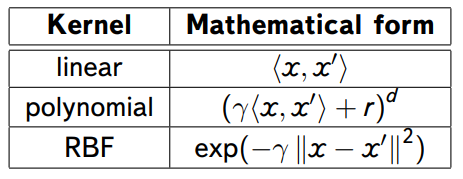



### Generating data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# here we assign values for constants
n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.subplot("131")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='autumn')
plt.title("Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.subplot("132")
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=50, cmap='autumn')

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.subplot("133")
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='autumn')
plt.show()

C:\Users\ezio\AppData\Local\Temp/ipykernel_7972/1002991445.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("131")
C:\Users\ezio\AppData\Local\Temp/ipykernel_7972/1002991445.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("132")
C:\Users\ezio\AppData\Local\Temp/ipykernel_7972/1002991445.py:25: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot("133")


In [2]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

x_train (shape = (40, 2))
x_test: (shape = (10, 2))
y_train: (shape = (40, 1))
y_test: (shape = (10, 1))
kernel is :linear


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


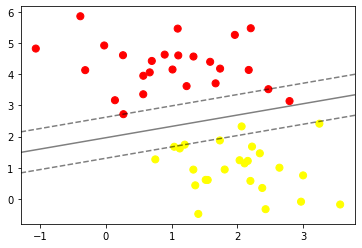

kernel is :rbf


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


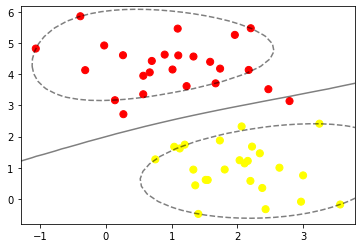

kernel is :poly


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


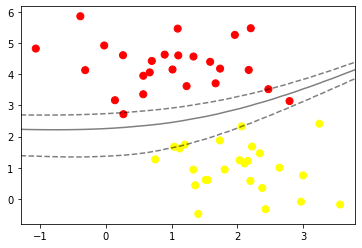

x_train (shape = (40, 2))
x_test: (shape = (10, 2))
y_train: (shape = (40, 1))
y_test: (shape = (10, 1))
kernel is :linear


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


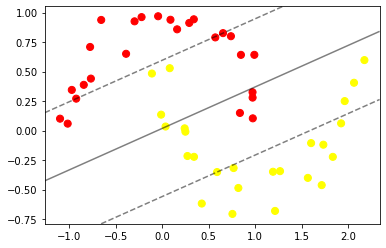

kernel is :rbf


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


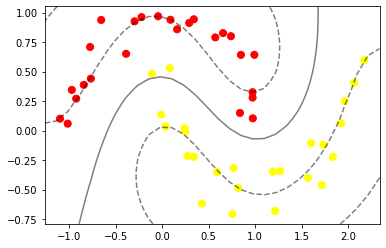

kernel is :poly


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


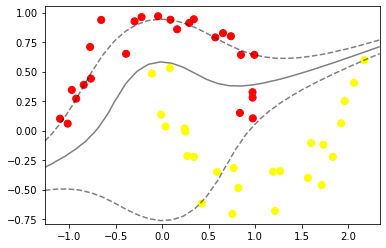

x_train (shape = (40, 2))
x_test: (shape = (10, 2))
y_train: (shape = (40, 1))
y_test: (shape = (10, 1))
kernel is :linear


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


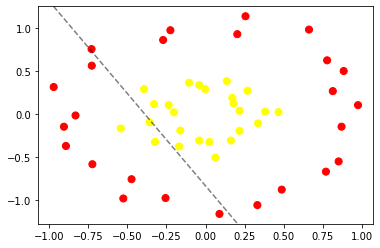

C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


kernel is :rbf


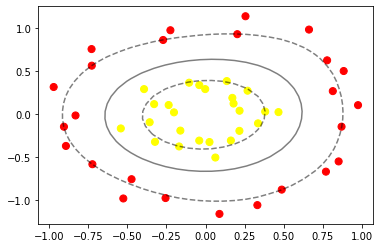

kernel is :poly


C:\Users\ezio\AppData\Local\pypoetry\Cache\virtualenvs\ml-0OlElQBV-py3.8\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


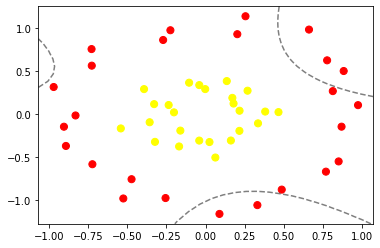

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def test_kernels(X: np.array, Y: np.array) -> None:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # x_train = np.expand_dims(x_train, axis=1)
    # x_test = np.expand_dims(x_test, axis=1)
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    print(f"x_train (shape = {x_train.shape})")
    print(f"x_test: (shape = {x_test.shape})")
    print(f"y_train: (shape = {y_train.shape})")
    print(f"y_test: (shape = {y_test.shape})")

    for i, kernel in enumerate(("linear", "rbf", "poly"), 1):
        print(f"kernel is :{kernel}")
        svm = SVC(kernel=kernel)
        svm.fit(x_train, y_train)
        # y_pred = svm.predict(x_test)

        # plt.subplot(f"13{i}")
        plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
        plot_svc_decision_function(svm)
        plt.show()

    # plt.show()

# test kernels for each dataset
# this is the approximate output you should get for the blobs dataset
for X, Y in [(X_blob, Y_blob), (X_moon, Y_moon), (X_circle, Y_circle)]:
    test_kernels(X, Y)
    print("=====================================")

### Exploring parameters effect
Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.



![alt text](http://cs604525.vk.me/v604525210/afd4/xuJnTRcY43g.jpg)

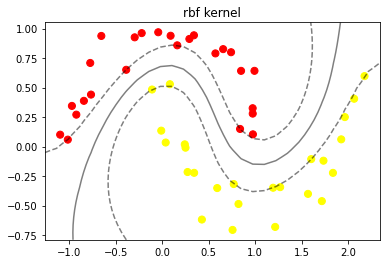

In [8]:
# Manually tune parameters for the moons dataset, plotting the result



### Neural nets

In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 7s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
__________________________________________________

In [30]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 1s 1ms/step - loss: 0.7167 - accuracy: 0.7758 - val_loss: 0.1774 - val_accuracy: 0.9522
Epoch 2/10
422/422 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.9048 - val_loss: 0.1311 - val_accuracy: 0.9645

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.11969053000211716
Test accuracy: 0.9686999917030334


## Try to change num of layers, their types, activations and optimizers
